# Benchmark Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

bm = pd.read_csv('readings.csv')

In [2]:
def plot_bars(df, title):
    fig, ax = plt.subplots()
    df.mean().plot(kind='barh',
                   xerr=df.std(),
                   ax=ax
                  )
    ax.set(xlabel='time (s)',
           title=title)
    plt.savefig(title+'.png', bbox_inches='tight')

## Report summary

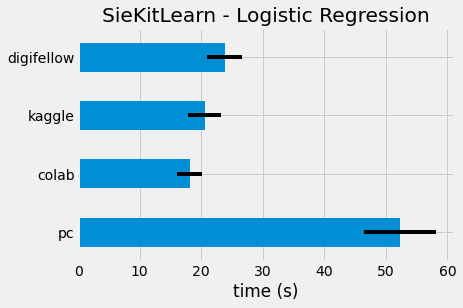

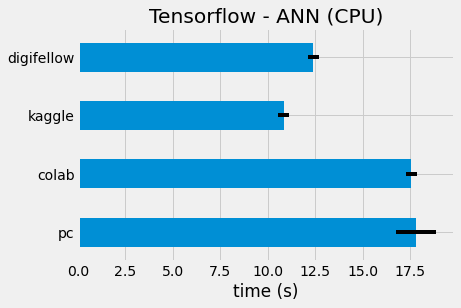

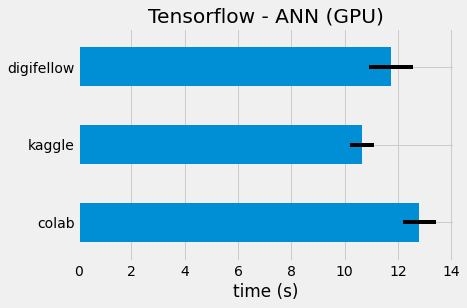

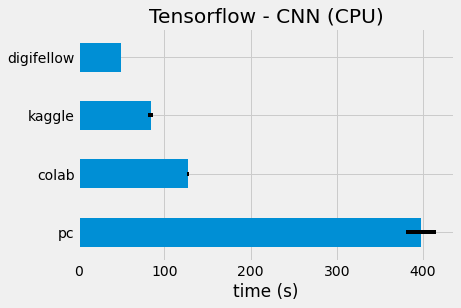

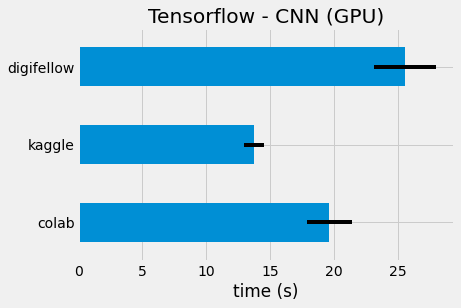

In [3]:
titles = ['SieKitLearn - Logistic Regression',
          'Tensorflow - ANN (CPU)',
          'Tensorflow - ANN (GPU)',
          'Tensorflow - CNN (CPU)',
          'Tensorflow - CNN (GPU)']

for alg, title in zip(bm.algorithm.unique(), titles):
    df = bm[bm.algorithm==alg].dropna(how='all', axis=1)
    plot_bars(df, title)

In [4]:
for alg, title in zip(bm.algorithm.unique(), titles):
    print(title)
    print(bm[bm.algorithm==alg].describe()[1:3])
    print('='*50+'\n')

SieKitLearn - Logistic Regression
             pc      colab     kaggle  digifellow
mean  52.265645  18.102007  20.543421   23.803855
std    5.881398   2.039679   2.652598    2.892232

Tensorflow - ANN (CPU)
             pc      colab     kaggle  digifellow
mean  17.830098  17.561319  10.839518   12.398528
std    1.042912   0.285654   0.280997    0.282626

Tensorflow - ANN (GPU)
      pc      colab     kaggle  digifellow
mean NaN  12.797829  10.648346   11.751862
std  NaN   0.628303   0.441335    0.825919

Tensorflow - CNN (CPU)
              pc       colab     kaggle  digifellow
mean  397.404172  127.461974  84.140425   49.677589
std    17.501088    0.993961   2.873912    0.424330

Tensorflow - CNN (GPU)
      pc      colab     kaggle  digifellow
mean NaN  19.645530  13.769940   25.541576
std  NaN   1.771591   0.796525    2.443222



## Overall score

In [5]:
def overall(alg):    
    lg = bm.loc[bm.algorithm==alg].drop('algorithm', axis=1)
    lg_ = lg.values.reshape(-1,)
    lg_n = (lg_-np.nanmin(lg_))/(np.nanmax(lg_)-np.nanmin(lg_)) # to min-max scale all readings
    return lg_n.reshape(10, 4)

bm_n = bm.drop('algorithm', axis=1)

for alg in bm.loc[:,'algorithm'].unique():
    bm_n.loc[bm.algorithm==alg] = overall(alg)
    
bm_n = (1-bm_n)*10 # from execution time to a score

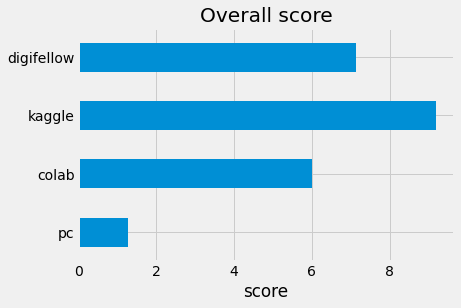

In [6]:
fig, ax = plt.subplots()
bm_n.mean().plot(kind='barh',
                   ax=ax)
ax.set(xlabel='score',
       title='Overall score')
plt.savefig('Overall score'+'.png', bbox_inches='tight')

:)